# Prueba de anotaciones

##### Importación de las librerías necesarias

In [1]:
from pycocotools.coco import COCO
import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

import utils_coco

##### Cargamos los datos del dataset de COCO

In [2]:
coco = COCO('dataset/instances_train2017.json')
# Get all existing category IDs and names in the whole dataset
category_ids = coco.getCatIds()
categories = coco.loadCats(category_ids)
#categories

loading annotations into memory...
Done (t=11.71s)
creating index...
index created!


Posteriormente, cargamos los datos relativos a estas categorías.

In [3]:
# get all images containing given categories
categories_train = utils_coco.get_train_categories()
catIds = coco.getCatIds(catNms=categories_train)

imgIds = []

for cat in catIds:
    imgIds += coco.getImgIds(catIds=cat)


In [4]:
annIds = coco.getAnnIds(imgIds=imgIds, catIds=catIds, iscrowd=None)
imgsAnns = coco.loadAnns(annIds)

imgsInfo = coco.loadImgs(imgIds)

imgsInfo = sorted(imgsInfo, key=lambda x: x["id"])
imgsAnns = sorted(imgsAnns, key=lambda x: x["image_id"])

In [5]:
lista=[]
i=0
j=0
while j < len(categories):
    if categories[j]['id']==i:
        lista.append(categories[j])
        j += 1
    else:
        lista.append({})
    i+=1

Definimos unas funciones para obtener visualmente las anotaciones de las imágenes.

In [6]:
def draw_boxes_by_index(INDEX=0):
    annotations = []
    bboxes = []
    classes = []
    for ann in imgsAnns:
        if ann['image_id'] == imgsInfo[INDEX]['id']:
            annotations.append(ann)
    for ann in annotations:
        bboxes.append(ann['bbox'])
        classes.append(lista[ann['category_id']]['name'])
    print(bboxes)

    utils_coco.draw_boxes(imgsInfo[INDEX], bboxes, classes)

[[123.39, 468.86, 39.07, 19.32]]


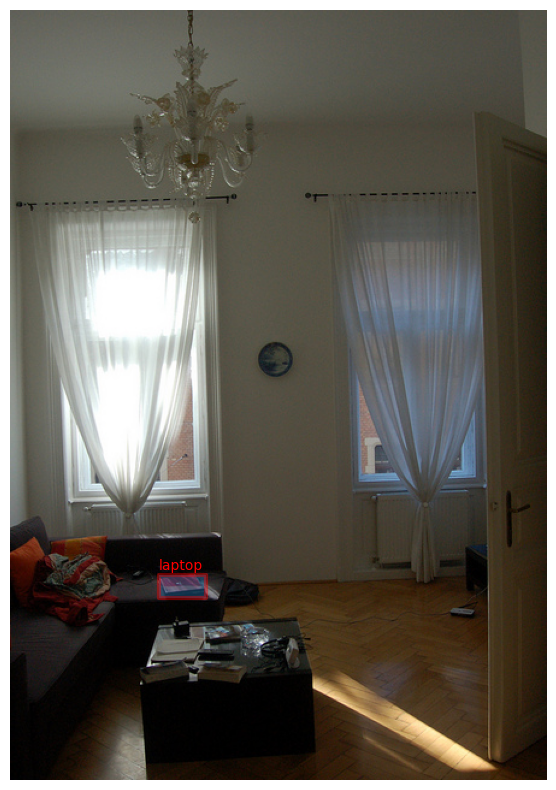

[[249.17, 50.7, 375.37, 277.21], [152.38, 50.29, 470.86, 312.38]]


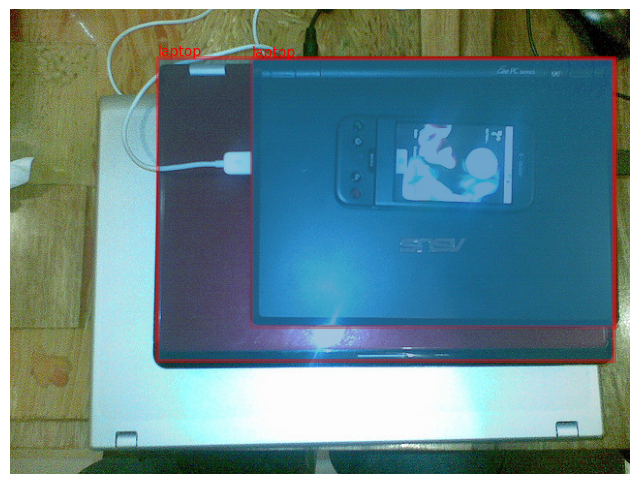

[[313.89, 267.51, 155.32, 186.6], [139.15, 175.0, 80.17, 96.83]]


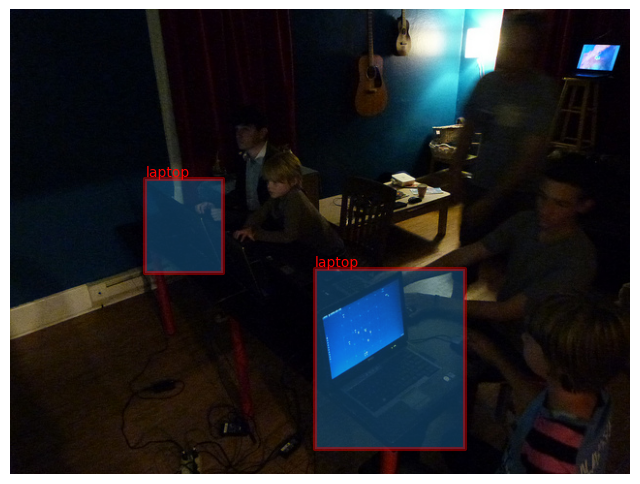

[[608.49, 200.92, 31.51, 64.46], [619.3, 246.61, 20.7, 18.99], [608.49, 200.92, 31.51, 64.46], [619.3, 246.61, 20.7, 18.99]]


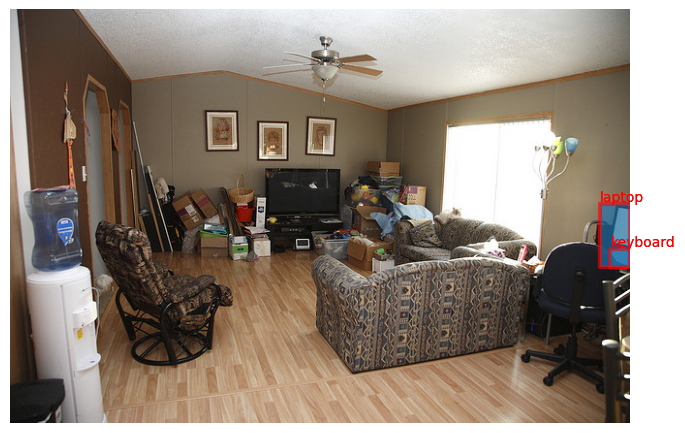

In [7]:
for i in range(4):
    draw_boxes_by_index(i)